# Selenium
Allow the remote contro of a browser, in this case firefox

See the [Manual](https://www.seleniumhq.org/docs/03_webdriver.jsp) 

In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 904 kB 25.1 MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnak

In [6]:
import sys
import os
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

main_path = os.getcwd()
download_folder_name = 'marketWatch_Downloads'
download_path = main_path+'\\'+download_folder_name
if os.path.exists(download_path) == True:
  for files in os.listdir(download_path):
    os.remove(os.path.join(download_path, files))
else:
  os.mkdir(download_path)

options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_experimental_option("prefs",{"download.default_directory":download_path,
                                             "download.prompt_for_download": False,
                                             "download.directory_upgrade": True,
                                             "safebrowsing.enabled": True})

driver = webdriver.Chrome(executable_path='chromedriver', options=options)

In [7]:
##################### Selenium Scraper ###########################
def header_market_table_data_crawler(driver): # This function will scrape the table headings and return it to user and wait for desired input to fetch the data
# Fetching the header names viz. US EUROPE Asia FX Rates Futures Crypto
    market_item_list = driver.find_elements_by_xpath("//div[contains(@class,'markets desktop')]/ul/li")

    print("Market items in the Market Table are:\n")
    header_count = 1
    for item in range(0, len(market_item_list)):
        if item == 7:
            # Reason : The market_item_list also consists of market_item_dropdown which is not required.
            break
        else:
            print(str(header_count) + ". " + market_item_list[item].text)
            header_count += 1
# Asking for Input and Clicking the Element
    choice_header = input("\nChoose Your Preference: ")

    if choice_header >= '8' or choice_header <= '0':
        print("\nWrong Choice: Refreshing the program..\n")
        refresh_reason = "Wrong Choice"
        refresh_page(driver,refresh_reason)
    else:
        print("\nYou chose: " + (market_item_list[int(choice_header)-1]).text)
        final_item_choice_header = market_item_list[int(choice_header)-1]
        driver.execute_script('arguments[0].click()', final_item_choice_header)
        # final_item_choice_header.click()
        time.sleep(2)
        click_table_data_symbol(driver)
#     final_item_choice_header = market_item_list[5]
#     final_item_choice_header.click()
#     time.sleep(2)
#     click_table_data_symbol(driver)

def click_table_data_symbol(driver): # This function will fetch the table data and display the symbol to the user and wait for the desired input to fetch the data
# Scraping the market table symbol names

    symbol_count = 1
    market_data_symbol_list = driver.find_elements_by_xpath("//div[contains(@class,'markets__table')]/table/tbody/tr/td[2]")
    print("\nSymbol list:\n")
    for market_item in market_data_symbol_list:
        print(str(symbol_count) + ". " + market_item.text)
        symbol_count += 1
# Asking for user input to Fetch the Element
    choice_symbol = input("\nChoose Your Preference: ")
    if choice_symbol >= '7' or choice_symbol <= '0':
        refresh_page(driver,refresh_reason="Wrong Choice")
        print("\nWrong Choice... Restarting from the Begining\n")
    else:
        final_choice_symbol = market_data_symbol_list[int(choice_symbol)-1]
        driver.execute_script('arguments[0].click()', final_choice_symbol)
        subnavigation_choice(driver)
    # final_choice_symbol = market_data_symbol_list[2]
    # final_choice_symbol.click()
    # overview_contracts_latest_scraper(driver)
    # subnavigation_choice(driver)

def refresh_page(driver,refresh_reason):
    driver.refresh()
    if refresh_reason == "Wrong Choice":
        header_market_table_data_crawler(driver)



################################################################################################################
##################################### Scraping Item Details#####################################################



def subnavigation_choice(driver): # This function gives User to choose his preferred choice of navigation he wants to scrape

    # Fetching the Sub Navigation header Names

    subnavigation_list = driver.find_elements_by_xpath("//div[contains(@class,'subnav')]/li")

    print("\nSub-Navigation Pane::::\n")
    # navigation_count = 1
    # for item in range(0,len(subnavigation_list)):
    #     print(str(navigation_count) + ". " + subnavigation_list[item].text)
    #     navigation_count += 1
    print("1.Overview")
    print("2.Charts")
    print("3.Historics")
    # Asking for User's Choice and forwarding to the desired function
    print("\nDon't Type no.2 as it is not done yet\n")
    subnav_choice = input("\nChoose Your Preferred option: ")

    if subnav_choice >= '4' or subnav_choice <= '0':# First_Try
        print("\nOops! Wrong Choice. Refreshing program\n")
        refresh_page(driver, refresh_reason="Wrong Choice")

    else:
        if subnav_choice == '1':
            print("\nScraping " + (subnavigation_list[int(subnav_choice) - 1]).text+ "\n")
            overview_scraper(driver)
        if subnav_choice == '2':
            print("\nCHARTS ARE NOT WORKING!!! RESTARTING PROGRAM" + "\n")
            refresh_page(driver,refresh_reason="Wrong Choice")
        if subnav_choice == '3':
            print("\nScraping " + (subnavigation_list[int(subnav_choice) - 1]).text+ "\n")
            historical_Quotes_scraper(driver)
    # charts_scraper(driver)
    # historical_Quotes_scraper(driver)
    # overview_contracts_latest_scraper(driver)



################################################################################################################
##################################### Scraping Overview ########################################################



def overview_scraper(driver):# This function will click the overview button
    overview_Xpath = driver.find_element_by_xpath("//div[contains(@class,'subnav')]/li[1]")
    overview_Xpath.location_once_scrolled_into_view
    driver.execute_script("arguments[0].click();", overview_Xpath)# Click the overview Button
    overview_keyData_scraper(driver)
    overview_performance_scraper(driver)
    overview_top_Performer_scraper(driver)
    overview_bottom_Performer_scraper(driver)
    overview_contracts_latest_scraper(driver)


def overview_keyData_scraper(driver):# Scraping the Primary Details viz. Key Data, Performance, Top Performer

    open_Data = driver.find_element_by_xpath("//div[contains(@class,'elements left')]//ul/li[1]/span[contains(@class,'primary')]").text
    dayRange_Data = driver.find_element_by_xpath("//div[contains(@class,'elements left')]//ul/li[2]/span[contains(@class,'primary')]").text
    week52Range_Data = driver.find_element_by_xpath("//div[contains(@class,'elements left')]//ul/li[3]/span[contains(@class,'primary')]").text
    keydata_handling(open_Data,dayRange_Data,week52Range_Data)


def overview_performance_scraper(driver): # Scraping Performance Data from Overview Tab

    performance_Xpath = driver.find_element_by_xpath("//div[contains(@class,'performance')]")
    performance_Xpath.location_once_scrolled_into_view
    performance_table_row_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'performance')]//table//tr")
    performance_table_row_data_list=[]
    for table_row in range(1,len(performance_table_row_Xpath)):
        performance_table_row_data_list.append(performance_table_row_Xpath[table_row-1].text)
    overview_performance_data_handling(performance_table_row_data_list)


def overview_top_Performer_scraper(driver):# Scraping Top Performer from Overview button
    # Check if top performer Xpath is present
    try:
        driver.find_element_by_xpath("//div[contains(@class,'ByIndexGainers')]/header/h2")
    except:
        print("Top Performer not found. Checking for Bottom Performer next")
        return

    top_performer_Xpath = driver.find_element_by_xpath("//div[contains(@class,'ByIndexGainers')]/header/h2")
    top_performer_Xpath.location_once_scrolled_into_view
    top_performer_table_header_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'ByIndexGainers')]/table/thead//th")
    top_performer_name_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'ByIndexGainers')]/table/tbody//tr/td[1]")
    top_performer_last_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'ByIndexGainers')]/table/tbody//tr/td[2]")
    top_performer_change_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'ByIndexGainers')]/table/tbody//tr/td[3]")
    top_performer_change_percent_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'ByIndexGainers')]/table/tbody//tr/td[4]")

    top_performer_table_header_data_list =[]
    top_performer_name_list = []
    top_performer_last_list = []
    top_performer_change_list = []
    top_performer_change_percent_list = []

# Scraping each row data separately for better data handling

    for table_header in range(0,len(top_performer_table_header_Xpath)): # Scraping Header Names from Top Performers Table
        top_performer_table_header_data_list.append(top_performer_table_header_Xpath[table_header].text)


    for table_name in range(0,len(top_performer_name_Xpath)): # Scraping Top Performer Companies From Top Performers Table
        top_performer_name_list.append(top_performer_name_Xpath[table_name].text)


    for table_last in range(0,len(top_performer_last_Xpath)): # Scraping Last Column Data From Top Performers Table
        top_performer_last_list.append(top_performer_last_Xpath[table_last].text)


    for table_change in range(0,len(top_performer_change_Xpath)): # Scraping Change Data From Top Performers Table
        top_performer_change_list.append(top_performer_change_Xpath[table_change].text)


    for table_change_percent in range(0,len(top_performer_change_percent_Xpath)): # Scraping Change percentage Data From Top Performers Table
        top_performer_change_percent_list.append(top_performer_change_percent_Xpath[table_change_percent].text)

    overview_performer_data_handling(top_performer_table_header_data_list,
                                         top_performer_name_list, top_performer_last_list,
                                         top_performer_change_list,top_performer_change_percent_list,reason = "Top Performer")


def overview_bottom_Performer_scraper(driver):
    # Check if top performer Xpath is present
    try:
        driver.find_element_by_xpath("//div[contains(@class,'ByIndexDecliners')]/header/h2")
    except:
        print("Bottom Performer not found.")
        return

    bottom_performer_Xpath = driver.find_element_by_xpath("//div[contains(@class,'ByIndexDecliners')]/header/h2")
    bottom_performer_Xpath.location_once_scrolled_into_view
    bottom_performer_table_header_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'ByIndexDecliners')]/table/thead//th")
    bottom_performer_name_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'ByIndexDecliners')]/table/tbody//tr/td[1]")
    bottom_performer_last_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'ByIndexDecliners')]/table/tbody//tr/td[2]")
    bottom_performer_change_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'ByIndexDecliners')]/table/tbody//tr/td[3]")
    bottom_performer_change_percent_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'ByIndexDecliners')]/table/tbody//tr/td[4]")

    bottom_performer_table_header_data_list = []
    bottom_performer_name_list = []
    bottom_performer_last_list = []
    bottom_performer_change_list = []
    bottom_performer_change_percent_list = []

    # Scraping each row data separately for better data handling
    for table_header in range(0, len(bottom_performer_table_header_Xpath)):  # Scraping Header Names from Bottom Performers Table
        bottom_performer_table_header_data_list.append(bottom_performer_table_header_Xpath[table_header].text)

    for table_name in range(0, len(bottom_performer_name_Xpath)):  # Scraping bottom Performer Companies From Bottom Performers Table
        bottom_performer_name_list.append(bottom_performer_name_Xpath[table_name].text)

    for table_last in range(0,len(bottom_performer_last_Xpath)):  # Scraping Last Column Data From Bottom Performers Table
        bottom_performer_last_list.append(bottom_performer_last_Xpath[table_last].text)

    for table_change in range(0,len(bottom_performer_change_Xpath)):  # Scraping Change Data From Bottom Performers Table
        bottom_performer_change_list.append(bottom_performer_change_Xpath[table_change].text)

    for table_change_percent in range(0, len(bottom_performer_change_percent_Xpath)):  # Scraping Change percentage Data From Bottom Performers Table
        bottom_performer_change_percent_list.append(bottom_performer_change_percent_Xpath[table_change_percent].text)

    overview_performer_data_handling(bottom_performer_table_header_data_list, bottom_performer_name_list,
                                         bottom_performer_last_list, bottom_performer_change_list,
                                         bottom_performer_change_percent_list, reason="Bottom Performer")



def overview_contracts_latest_scraper(driver): # This function only works in futures
    # Check if Contracts found
    # breakpoint()
    try:
        driver.find_element_by_xpath("//div[contains(@class,'FuturesContracts')]")
        print("Recent Contracts Found!!")
    except:
        print("No Recent Contracts Found!!")
        driver.close()
        sys.exit()

    body = driver.find_element_by_css_selector('body')
    body.send_keys(Keys.PAGE_DOWN)
    recent_contracts_Xpath = driver.find_element_by_xpath("//div[contains(@class,'FuturesContracts')]")
    recent_contracts_Xpath.location_once_scrolled_into_view
    recent_contracts_table_header_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'FuturesContracts')]/table/thead/tr/th")
    recent_contracts_table_contracts_name_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'FuturesContracts')]/table/tbody/tr/td[1]")
    recent_contracts_table_contracts_last_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'FuturesContracts')]/table/tbody/tr/td[2]")
    recent_contracts_table_contracts_change_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'FuturesContracts')]/table/tbody/tr/td[3]")
    recent_contracts_table_contracts_open_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'FuturesContracts')]/table/tbody/tr/td[4]")
    recent_contracts_table_contracts_high_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'FuturesContracts')]/table/tbody/tr/td[5]")
    recent_contracts_table_contracts_low_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'FuturesContracts')]/table/tbody/tr/td[6]")
    recent_contracts_table_contracts_date_Xpath = driver.find_elements_by_xpath("//div[contains(@class,'FuturesContracts')]/table/tbody/tr/td[7]")

    recent_contracts_table_header_list =[]
    recent_contracts_table_contracts_name_list = []
    recent_contracts_table_contracts_last_list = []
    recent_contracts_table_contracts_change_list = []
    recent_contracts_table_contracts_open_list = []
    recent_contracts_table_contracts_high_list = []
    recent_contracts_table_contracts_low_list = []
    recent_contracts_table_contracts_date_list = []

    for header_data in range(0,len(recent_contracts_table_header_Xpath)):
        if header_data == 0:
            recent_contracts_table_header_list.append('NAME')
        else:
            recent_contracts_table_header_list.append(recent_contracts_table_header_Xpath[header_data].text)
    # print(recent_contracts_table_header_list)

    for name_data in range(0,len(recent_contracts_table_contracts_name_Xpath)):
        recent_contracts_table_contracts_name_list.append(recent_contracts_table_contracts_name_Xpath[name_data].text)
    # print(recent_contracts_table_contracts_name_list)

    for last_data in range(0,len(recent_contracts_table_contracts_last_Xpath)):
        recent_contracts_table_contracts_last_list.append(recent_contracts_table_contracts_last_Xpath[last_data].text)
    # print(recent_contracts_table_contracts_last_list)

    for change_data in range(0,len(recent_contracts_table_contracts_change_Xpath)):
        recent_contracts_table_contracts_change_list.append(recent_contracts_table_contracts_change_Xpath[change_data].text)
    # print(recent_contracts_table_contracts_change_list)

    for open_data in range(0,len(recent_contracts_table_contracts_open_Xpath)):
        recent_contracts_table_contracts_open_list.append(recent_contracts_table_contracts_open_Xpath[open_data].text)
    # print(recent_contracts_table_contracts_open_list)

    for high_data in range(0,len(recent_contracts_table_contracts_high_Xpath)):
        recent_contracts_table_contracts_high_list.append(recent_contracts_table_contracts_high_Xpath[high_data].text)
    # print(recent_contracts_table_contracts_high_list)

    for low_data in range(0,len(recent_contracts_table_contracts_low_Xpath)):
        recent_contracts_table_contracts_low_list.append(recent_contracts_table_contracts_low_Xpath[low_data].text)
    # print(recent_contracts_table_contracts_low_list)

    for date_data in range(0,len(recent_contracts_table_contracts_date_Xpath)):
        recent_contracts_table_contracts_date_list.append(recent_contracts_table_contracts_date_Xpath[date_data].text)
    # print(recent_contracts_table_contracts_date_list)

    future_contract_data_handling(recent_contracts_table_header_list,recent_contracts_table_contracts_name_list,recent_contracts_table_contracts_last_list,
                                      recent_contracts_table_contracts_change_list,recent_contracts_table_contracts_open_list,
                                      recent_contracts_table_contracts_high_list,recent_contracts_table_contracts_low_list,recent_contracts_table_contracts_date_list)



################################################################################################################
##################################### Scraping Charts Details#####################################################



def charts_scraper(driver):
    charts_xpath = driver.find_element_by_xpath("//div[contains(@class,'subnav')]/li[2]")
    print("Not available Right Now")




################################################################################################################
##################################### Scraping Historical Quotes Details#####################################################



def historical_Quotes_scraper(driver):

    historical_Xpath = driver.find_element_by_xpath("//div[contains(@class,'subnav')]/li[3]/a")

    body = driver.find_element_by_css_selector('body')
    body.send_keys(Keys.PAGE_DOWN)

    driver.execute_script('arguments[0].click()', historical_Xpath)

    # Show Result Frequency
    # breakpoint()
    time.sleep(2)
    result_frequency_list = driver.find_elements_by_xpath("//div[contains(@class,'element__options')]/ul/li")

    body = driver.find_element_by_css_selector('body')
    body.send_keys(Keys.PAGE_DOWN)

    print("\nResult Frequency: \n")

    freq_count = 1

    for item in range(0, len(result_frequency_list)):
        print(str(freq_count) + ". " + result_frequency_list[item].text)
        freq_count += 1

    # Asking for Input and Clicking the Element
    choice_result = input("\nChoose Your Preference: ")

    if choice_result >= '4' or choice_result <= '0':
        print("\nWrong Choice: Refreshing the program..\n")
        refresh_page(driver,refresh_reason = "Wrong Choice")
    else:
        print("\nYou chose: " + (result_frequency_list[int(choice_result)-1]).text)
        final_item_choice_result = result_frequency_list[int(choice_result)-1]
        driver.execute_script('arguments[0].click()', final_item_choice_result)
        time.sleep(2)
        Download_CSV(driver,choice_result)

    # final_item_choice_result = result_frequency_list[0]# Daily
    # # final_item_choice_result = result_frequency_list[1]  # Weekly
    # # final_item_choice_result = result_frequency_list[2]  # Monthly
    # driver.execute_script('arguments[0].click()', final_item_choice_result)
    # Download_CSV(driver)

def Download_CSV(driver,choice_result):# Downloading CSV
    download_Xpath = driver.find_element_by_xpath("(//div[contains(@class,'tabPanes')]/div["+str(choice_result)+"]//a)[1]")
    driver.execute_script('arguments[0].click()', download_Xpath)
    main_path = os.getcwd()
    download_folder_name = 'marketWatch_Downloads'
    download_path = main_path + '\\' + download_folder_name
    if os.path.exists(download_path) == True:
        print("\nDownloading CSV\n")
        while len(os.listdir(download_path)) == 0:
            time.sleep(1)
            if len(os.listdir(download_path)) > 0:
                break
    historical_quotes_data_handling()


In [8]:

################################################ Data Handling ################################


def keydata_handling(open_Data,dayRange_Data,week52Range_Data): # Key Data Conversion to Dataframe
    keydata_df = pd.DataFrame(columns=['Open', 'Day_Range','52_Weeks_Range'])
    keydata_df.loc[0] = [open_Data,dayRange_Data,week52Range_Data]
    print("Key Data:\n")
    print(keydata_df)


def overview_performance_data_handling(performance_table_row_data_list):
    preprocessed_list = []
    for items in performance_table_row_data_list:
        preprocessed_list += (items.splitlines())
    row_data = []
    column_data = []
    for item in range(0, len(preprocessed_list)):
        if item % 2 == 1:
            row_data.append(preprocessed_list[item])
        else:
            column_data.append(preprocessed_list[item])
    performance_df = pd.DataFrame(columns=column_data)
    data_to_append = row_data
    performance_df_length = len(performance_df)
    performance_df.loc[performance_df_length] = data_to_append
    print("\nPerformance Data:\n")
    print(performance_df)

def overview_performer_data_handling(performer_table_header_data_list,performer_name_list,
                                     performer_last_list, performer_change_list,performer_change_percent_list,reason):
    top_performer_df = ''
    bottom_performer_df = ''
    if reason == "Top Performer":
        top_performer_df = pd.DataFrame(list(zip(performer_name_list, performer_last_list, performer_change_list,
                                                 performer_change_percent_list)), columns=performer_table_header_data_list)
        print("\nTop Performer:\n")
        print(top_performer_df)

    if reason == "Bottom Performer":
        bottom_performer_df = pd.DataFrame(list(zip(performer_name_list, performer_last_list, performer_change_list,
                                                 performer_change_percent_list)), columns=performer_table_header_data_list)
        print("\nBottom Performer:\n")
        print(bottom_performer_df)

def historical_quotes_data_handling():
    main_path = os.getcwd()
    download_folder_name = 'marketWatch_Downloads'
    download_path = main_path + '\\' + download_folder_name
    download_list = os.listdir(download_path)
    csv_file_path = ''
    for item in download_list:
        if '.csv' in item:
            print("\nCSV File found!.Converting to dataframe\n")
            csv_file_path = str(os.path.join(download_path, item))
    historical_quotes_df = pd.read_csv(csv_file_path)

    print(historical_quotes_df)
    print('Plotting the data')
    try:  # For row data with comma and decimal point
        historical_quotes_df['Date'] = pd.to_datetime(historical_quotes_df['Date'])
        historical_quotes_df['Open'] = historical_quotes_df['Open'].str.replace(',', '').astype(float)
        historical_quotes_df['High'] = historical_quotes_df['High'].str.replace(',', '').astype(float)
        historical_quotes_df['Low'] = historical_quotes_df['Low'].str.replace(',', '').astype(float)
        historical_quotes_df['Close'] = historical_quotes_df['Close'].str.replace(',', '').astype(float)

    except:
        pass

    try:  # For row data with decimal point
        historical_quotes_df['Date'] = pd.to_datetime(historical_quotes_df['Date'])
        historical_quotes_df['Open'] = historical_quotes_df['Open'].astype(float)
        historical_quotes_df['High'] = historical_quotes_df['High'].astype(float)
        historical_quotes_df['Low'] = historical_quotes_df['Low'].astype(float)
        historical_quotes_df['Close'] = historical_quotes_df['Close'].astype(float)

    except:
        pass

    try:  # For row data with percentage and decimal point

        historical_quotes_df['Date'] = pd.to_datetime(historical_quotes_df['Date'])
        historical_quotes_df['Open'] = historical_quotes_df['Open'].str.replace('%', '').astype(float)
        historical_quotes_df['High'] = historical_quotes_df['High'].str.replace('%', '').astype(float)
        historical_quotes_df['Low'] = historical_quotes_df['Low'].str.replace('%', '').astype(float)
        historical_quotes_df['Close'] = historical_quotes_df['Close'].str.replace('%', '').astype(float)
        print("All the values except Date are in percentage. For plotting needed to remove that")

    except:
        pass

    historical_quotes_df[['Date', 'Open', 'High', 'Low', 'Close']].plot(x="Date", kind="bar")

    plt.show()



def future_contract_data_handling(recent_contracts_table_header_list,recent_contracts_table_contracts_name_list,recent_contracts_table_contracts_last_list,
                                      recent_contracts_table_contracts_change_list,recent_contracts_table_contracts_open_list,
                                      recent_contracts_table_contracts_high_list,recent_contracts_table_contracts_low_list,recent_contracts_table_contracts_date_list):
    recent_contracts_df = ''

    recent_contracts_df = pd.DataFrame(list(zip(recent_contracts_table_contracts_name_list, recent_contracts_table_contracts_last_list,recent_contracts_table_contracts_change_list,
                                                recent_contracts_table_contracts_open_list,recent_contracts_table_contracts_high_list,recent_contracts_table_contracts_low_list,
                                                recent_contracts_table_contracts_date_list)), columns=recent_contracts_table_header_list)

    print(recent_contracts_df)

Market items in the Market Table are:

1. US
2. Europe
3. Asia
4. FX
5. Rates
6. Futures
7. Crypto

Choose Your Preference: 7

You chose: Crypto

Symbol list:

1. Bitcoin USD
2. Ethereum USD
3. Ripple USD
4. Bitcoin Cash USD
5. Litecoin USD
6. Monero USD

Choose Your Preference: 6

Sub-Navigation Pane::::

1.Overview
2.Charts
3.Historics

Don't Type no.2 as it is not done yet


Choose Your Preferred option: 3

Scraping 


Result Frequency: 

1. DAILY
2. WEEKLY
3. MONTHLY

Choose Your Preference: 1

You chose: DAILY



CSV File found!.Converting to dataframe

          Date    Open    High     Low   Close
0   08/30/2021  293.80  296.07  282.00  294.74
1   08/29/2021  301.76  307.20  288.00  293.86
2   08/28/2021  313.97  316.98  300.03  301.93
3   08/27/2021  294.53  314.97  285.69  313.97
4   08/26/2021  309.20  316.94  286.59  294.53
5   08/25/2021  313.87  324.68  298.57  309.20
6   08/24/2021  318.39  339.68  302.94  312.98
7   08/23/2021  291.33  333.89  290.42  318.39
8   08/22/20

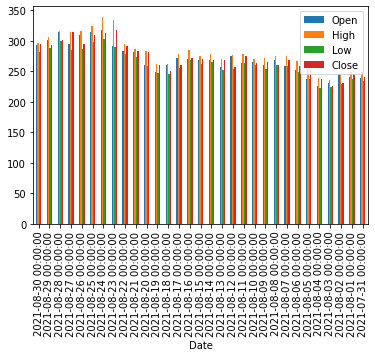

In [9]:
driver.get("https://www.marketwatch.com/")
header_market_table_data_crawler(driver)